In [14]:
import random
import numpy as np
# The python implementation of the baseline k-means can be found in the utils folder 
from utils.bkmeans import BaselineKMeans
from utils.bkmeans import WorkerKmeans

## Baseline K-Means for anomaly detection (benign/baseline - anomalous)

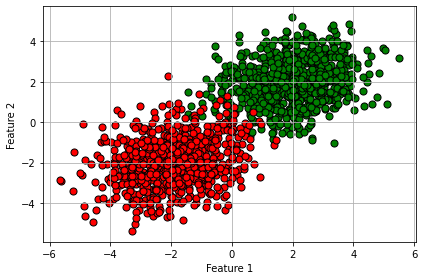

In [8]:
from scipy.spatial.distance import mahalanobis

# define the number of clusters and features
n_clusters = 2
n_features = 2

# generate some data with two clusters
X = np.random.randn(1500, n_features)
b_lspace = np.linspace(1,3,750) # benign
a_lspace = np.linspace(1,3,750) # anomalous
for i in range(750):
  X[i, :] += b_lspace[i]
for i in range(750,1500,1):
  X[i, :] -= a_lspace[i-750]

import matplotlib.pyplot as plt
plt.scatter(X[:750, 0],
             X[:750, 1],
             c='g',
             marker='o',
             edgecolor='black',
             s=50)
plt.scatter(X[750:, 0],
             X[750:, 1],
             c='r',
             marker='o',
             edgecolor='black',
             s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.tight_layout()
plt.show()

In [9]:
# instantiate a BaselineKMeans object with k=2 and the baseline data
baseline_X = X[:250,:]
fit_X = X[250:,:]
kmeans = BaselineKMeans(baseline_data=baseline_X,max_iterations=50,percentile=98)

# fit the K-means model to the training data
kmeans.fit(fit_X)

iteration #  1
iteration #  2
iteration #  3
iteration #  4
iteration #  5
iteration #  6
iteration #  7
Converged!


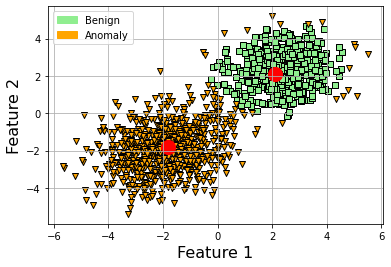

In [10]:
# plot the results
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

colors = ['lightgreen','orange']
markers = ['s','v']
labels = ['Benign', 'Anomaly']
for i in range(len(kmeans.clusters)):
    for point in kmeans.clusters[i]:
        plt.scatter(fit_X[point][0], fit_X[point][1], color=colors[i],edgecolor='black',marker = markers[i])
    plt.scatter(kmeans.centroids[i][0], kmeans.centroids[i][1], color='r', marker='o', s=200)
plt.xlabel('Feature 1',fontsize=16)
plt.ylabel('Feature 2',fontsize=16)
green_patch = mpatches.Patch(color='lightgreen', label='Benign')
orange_patch = mpatches.Patch(color='orange', label='Anomaly')
plt.legend(handles=[green_patch,orange_patch])
plt.grid()
plt.show()

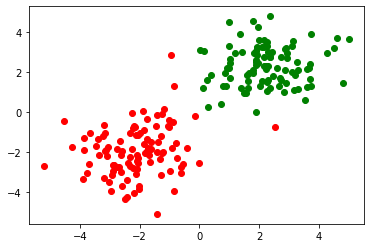

In [11]:
# generate test data with two clusters
X_test = np.random.randn(200, n_features)
b_lspace = np.linspace(1.7,2.6,100)
a_lspace = np.linspace(1.2,3,100)
y_true = []
for i in range(100):
  X_test[i, :] += b_lspace[i]
  y_true.append(0)
for i in range(100,200,1):
  X_test[i, :] -= a_lspace[i-100]
  y_true.append(1)

y_true = np.array(y_true)
y_pred = kmeans.predict(X_test)

# plot the results
import matplotlib.pyplot as plt
colors = ['g','r']
for j in range(len(X_test)):
    plt.scatter(X_test[j][0], X_test[j][1], color=colors[y_pred[j]])
plt.show()

In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score
# calculate precision, recall, and f1 score
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.970873786407767
Recall: 1.0
F1 Score: 0.9852216748768473


### Export statistics to a worker

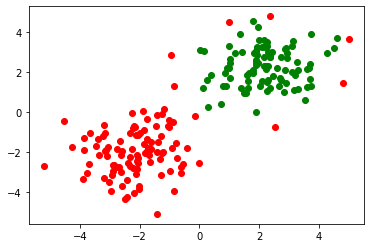

Precision: 0.9345794392523364
Recall: 1.0
F1 Score: 0.966183574879227


In [13]:
kmeans_worker = WorkerKmeans(*kmeans.export_stats())
y_pred = kmeans_worker.predict(X_test)

# plot the results
import matplotlib.pyplot as plt
colors = ['g','r']
for j in range(len(X_test)):
    plt.scatter(X_test[j][0], X_test[j][1], color=colors[y_pred[j]])
plt.show()

# calculate precision, recall, and f1 score
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)